In [3]:
import os
import pandas as pd

def load_imdb(path):
    data, labels = [], []
    for label in ["pos", "neg"]:
        folder = os.path.join(path, label)
        for fname in os.listdir(folder):
            with open(os.path.join(folder, fname), encoding="utf-8") as f:
                data.append(f.read())
                labels.append(1 if label=="pos" else 0)
    return pd.DataFrame({"review": data, "sentiment": labels})

train_df = load_imdb("aclImdb/train")
# test_df  = load_imdb("aclImdb/test")


In [4]:
print("Train set size:", len(train_df))
# print("Test set size:", len(test_df))
print(train_df)

Train set size: 25000
                                                  review  sentiment
0      Bromwell High is a cartoon comedy. It ran at t...          1
1      Homelessness (or Houselessness as George Carli...          1
2      Brilliant over-acting by Lesley Ann Warren. Be...          1
3      This is easily the most underrated film inn th...          1
4      This is not the typical Mel Brooks film. It wa...          1
...                                                  ...        ...
24995  Towards the end of the movie, I felt it was to...          0
24996  This is the kind of movie that my enemies cont...          0
24997  I saw 'Descent' last night at the Stockholm Fi...          0
24998  Some films that you pick up for a pound turn o...          0
24999  This is one of the dumbest films, I've ever se...          0

[25000 rows x 2 columns]


In [5]:
# Merge train+test or inspect separately
df = pd.concat([train_df], ignore_index=True)

# 1. Average review length (in words)
df["word_count"] = df.review.str.split().apply(len)
print("Avg words:", df.word_count.mean())

# 2. Vocabulary size
vocab = set(" ".join(df.review).split())
print("Vocab size:", len(vocab))

# 3. Class balance
print(df.sentiment.value_counts(normalize=True))


Avg words: 233.7872
Vocab size: 280617
sentiment
1    0.5
0    0.5
Name: proportion, dtype: float64


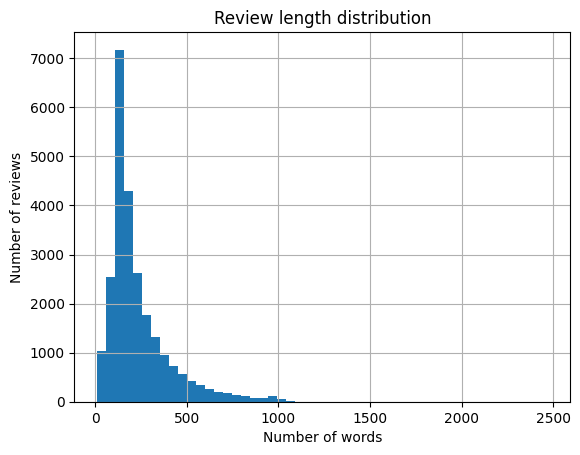

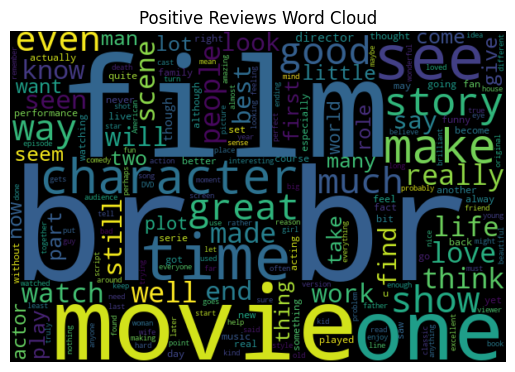

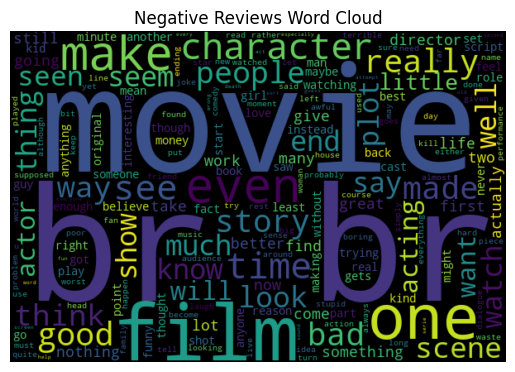

In [6]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Histogram of review lengths
plt.figure()
df.word_count.hist(bins=50)
plt.xlabel("Number of words")
plt.ylabel("Number of reviews")
plt.title("Review length distribution")
plt.show()

# Word clouds for pos vs. neg
for label, title in [(1, "Positive"), (0, "Negative")]:
    text = " ".join(df[df.sentiment==label].review)
    wc = WordCloud(width=600, height=400).generate(text)
    plt.figure()
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"{title} Reviews Word Cloud")
    plt.show()


In [7]:
dup_count = df.review.duplicated().sum()
print(f"Duplicates: {dup_count}")

Duplicates: 96


In [8]:
import re

def clean_text(text):
    text = text.lower()
    text = re.sub(r"<.*?>", " ", text)             # remove HTML tags
    text = re.sub(r"http\S+|www\.\S+", " ", text) # remove URLs
    text = re.sub(r"[^a-z0-9\s']", " ", text)     # keep alphanumeric + apostrophes
    text = re.sub(r"\s+", " ", text).strip()      # collapse whitespace
    return text

df["clean"] = df.review.apply(clean_text)
print("Cleaned text sample:")
print(df.clean.sample(5).to_string(index=False))


Cleaned text sample:
a featherweight plot and dubious characterizati...
this is quite possibly the worst movie i have e...
lauren bacall and charles boyer do not provide ...
this one is just like the 6th movie the movie i...
at the time my left foot was the little movie t...


In [18]:
# ...existing code...
import nltk

print("NLTK data directory:", nltk.data.path)

nltk.download("punkt", quiet=False, force=True)
nltk.download("stopwords", quiet=False, force=True)
nltk.download("wordnet", quiet=False, force=True)
# ...existing code...

NLTK data directory: ['C:\\Users\\japne/nltk_data', 'C:\\Program Files\\WindowsApps\\PythonSoftwareFoundation.Python.3.11_3.11.2544.0_x64__qbz5n2kfra8p0\\nltk_data', 'C:\\Program Files\\WindowsApps\\PythonSoftwareFoundation.Python.3.11_3.11.2544.0_x64__qbz5n2kfra8p0\\share\\nltk_data', 'C:\\Program Files\\WindowsApps\\PythonSoftwareFoundation.Python.3.11_3.11.2544.0_x64__qbz5n2kfra8p0\\lib\\nltk_data', 'C:\\Users\\japne\\AppData\\Roaming\\nltk_data', 'C:\\nltk_data', 'D:\\nltk_data', 'E:\\nltk_data']


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\japne\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\japne\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\japne\AppData\Roaming\nltk_data...


True

In [23]:
import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [12]:
print(df)

                                                  review  sentiment  \
0      Bromwell High is a cartoon comedy. It ran at t...          1   
1      Homelessness (or Houselessness as George Carli...          1   
2      Brilliant over-acting by Lesley Ann Warren. Be...          1   
3      This is easily the most underrated film inn th...          1   
4      This is not the typical Mel Brooks film. It wa...          1   
...                                                  ...        ...   
24995  Towards the end of the movie, I felt it was to...          0   
24996  This is the kind of movie that my enemies cont...          0   
24997  I saw 'Descent' last night at the Stockholm Fi...          0   
24998  Some films that you pick up for a pound turn o...          0   
24999  This is one of the dumbest films, I've ever se...          0   

       word_count                                              clean  
0             140  bromwell high is a cartoon comedy it ran at th...  
1    

In [13]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download("punkt")
nltk.download("stopwords")
nltk.download("wordnet")

stop = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()

# (re)define your tokenizer function
def tokenize_norm(text):
    tokens = nltk.word_tokenize(text)              # now punkt is available
    tokens = [t for t in tokens if t not in stop and len(t)>1]
    tokens = [lemmatizer.lemmatize(t) for t in tokens]
    return tokens

# Apply to your DataFrame
df['tokens'] = df['clean'].apply(tokenize_norm)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\japne\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\japne\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\japne\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [17]:
# sample  of tokens
print("Sample tokens:")
print(df.tokens.sample(5).to_string(index=False))

print("\n\n")
# print one complete
print("Sample complete review:")
print(df.iloc[0].review)
print("Sample cleaned review:")
print(df.iloc[0].clean)
print("Sample tokenized review:")
print(df.iloc[0].tokens)
len(df.iloc[0].tokens)

Sample tokens:
[great, adaptation, great, miniseries, right, p...
[n't, understand, low, rating, film, 's, deligh...
[third, collaboration, karloff, lugosi, see, mo...
[wow, probable, worst, movie, ever, seen, perso...
[aaron, spelling, produced, made, television, w...



Sample complete review:
Bromwell High is a cartoon comedy. It ran at the same time as some other programs about school life, such as "Teachers". My 35 years in the teaching profession lead me to believe that Bromwell High's satire is much closer to reality than is "Teachers". The scramble to survive financially, the insightful students who can see right through their pathetic teachers' pomp, the pettiness of the whole situation, all remind me of the schools I knew and their students. When I saw the episode in which a student repeatedly tried to burn down the school, I immediately recalled ......... at .......... High. A classic line: INSPECTOR: I'm here to sack one of your teachers. STUDENT: Welcome to Bromwell High. 

73

In [22]:
import os
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from scipy import sparse
from nltk.tokenize import RegexpTokenizer


# 2. Sparse Features
print("Computing Bag-of-Words…")
bow_vectorizer = CountVectorizer(ngram_range=(1,2), min_df=5, max_df=0.8)
X_bow = bow_vectorizer.fit_transform(df['clean'])

print("Computing TF-IDF…")
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1,2), min_df=5, max_df=0.8, smooth_idf=True)
X_tfidf = tfidf_vectorizer.fit_transform(df['clean'])

# 3. Dense Features
# print("Computing GloVe…")
# glove_path = "glove.6B.50d.txt"
# glove = {}
# with open(glove_path, "r", encoding="utf-8") as f:
#     for line in f:
#         values = line.split()
#         word = values[0]
#         vector = np.array(values[1:], dtype="float32")
#         glove[word] = vector
# def get_glove_vector(tokens):
#     vectors = [glove.get(token, np.zeros(50)) for token in tokens]
#     return np.mean(vectors, axis=0)
# X_glove = np.array([get_glove_vector(tokens) for tokens in df['tokens']])


# 5. Summary
print(f"Saved Bag-of-Words matrix   → embeddings/X_bow.npz    (shape {X_bow.shape})")
print(f"Saved TF-IDF matrix         → embeddings/X_tfidf.npz (shape {X_tfidf.shape})")
# print(f"Saved GloVe array           → embeddings/X_glove.npy  (shape {X_glove.shape})")

Computing Bag-of-Words…
Computing TF-IDF…
Saved Bag-of-Words matrix   → embeddings/X_bow.npz    (shape (25000, 155447))
Saved TF-IDF matrix         → embeddings/X_tfidf.npz (shape (25000, 155447))


In [23]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model    import LogisticRegression
from sklearn.naive_bayes     import MultinomialNB
from sklearn.svm             import LinearSVC
from sklearn.metrics         import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report
)

# 1) Choose your feature matrix and labels
#    e.g. X = X_bow or X = X_tfidf, and y = df['sentiment']
X = X_tfidf   # or X_bow
y = df['sentiment'].values

# 2) Split train / test
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# 3) Instantiate models with “reasonable” defaults
models = {
    "LogisticRegression": LogisticRegression(
        C=1.0,             # inverse regularization strength
        solver='liblinear',
        max_iter=1000
    ),
    "MultinomialNB": MultinomialNB(
        alpha=1.0          # Laplace smoothing
    ),
    "LinearSVC": LinearSVC(
        C=1.0,             # regularization
        max_iter=5000
    )
}

# 4) Train & evaluate each
for name, model in models.items():
    print(f"\n=== {name} ===")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Metrics
    print("Accuracy :", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall   :", recall_score(y_test, y_pred))
    print("F1-score :", f1_score(y_test, y_pred))
    
    # Confusion matrix & full report
    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, digits=4))



=== LogisticRegression ===
Accuracy : 0.8834
Precision: 0.8713676869430453
Recall   : 0.8996
F1-score : 0.8852588073213934

Confusion Matrix:
[[2168  332]
 [ 251 2249]]

Classification Report:
              precision    recall  f1-score   support

           0     0.8962    0.8672    0.8815      2500
           1     0.8714    0.8996    0.8853      2500

    accuracy                         0.8834      5000
   macro avg     0.8838    0.8834    0.8834      5000
weighted avg     0.8838    0.8834    0.8834      5000


=== MultinomialNB ===
Accuracy : 0.875
Precision: 0.8869170449855551
Recall   : 0.8596
F1-score : 0.8730448913264269

Confusion Matrix:
[[2226  274]
 [ 351 2149]]

Classification Report:
              precision    recall  f1-score   support

           0     0.8638    0.8904    0.8769      2500
           1     0.8869    0.8596    0.8730      2500

    accuracy                         0.8750      5000
   macro avg     0.8754    0.8750    0.8750      5000
weighted avg     0.

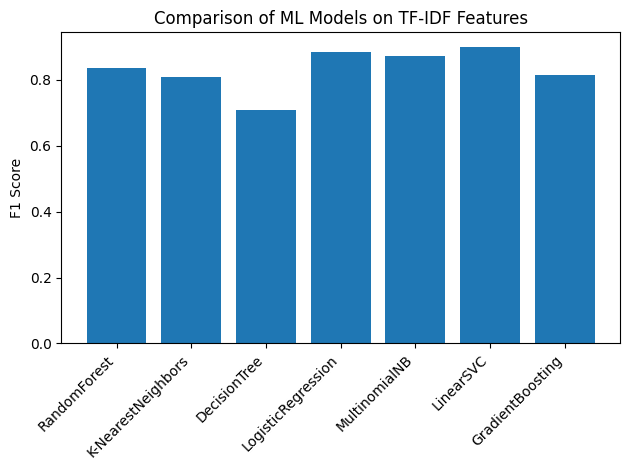

RandomForest     Accuracy = 0.8382,  F1 = 0.8370
K-NearestNeighbors  Accuracy = 0.7968,  F1 = 0.8087
DecisionTree     Accuracy = 0.7066,  F1 = 0.7074
LogisticRegression  Accuracy = 0.8834,  F1 = 0.8853
MultinomialNB    Accuracy = 0.8750,  F1 = 0.8730
LinearSVC        Accuracy = 0.8984,  F1 = 0.8990
GradientBoosting  Accuracy = 0.8046,  F1 = 0.8153


In [29]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import sparse
from sklearn.model_selection import train_test_split
from sklearn.linear_model    import LogisticRegression
from sklearn.naive_bayes     import MultinomialNB
from sklearn.svm             import LinearSVC
from sklearn.ensemble        import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree           import DecisionTreeClassifier
from sklearn.neighbors       import KNeighborsClassifier
from sklearn.metrics         import accuracy_score, f1_score

# 1) Load TF-IDF features and labels
X_tfidf = X_tfidf
y = df['sentiment'].values

# 2) Train/Test split
X_train, X_test, y_train, y_test = train_test_split(
    X_tfidf, y, test_size=0.2, random_state=42, stratify=y
)

# 3) Define a suite of models
models = {
    "RandomForest": RandomForestClassifier(n_estimators=100, random_state=42),
    "K-NearestNeighbors": KNeighborsClassifier(n_neighbors=5),
    "DecisionTree": DecisionTreeClassifier(random_state=42),
    "LogisticRegression": LogisticRegression(C=1.0, solver='liblinear', max_iter=1000),
    "MultinomialNB": MultinomialNB(alpha=1.0),  
    "LinearSVC": LinearSVC(C=1.0, max_iter=5000),
    "GradientBoosting": GradientBoostingClassifier(n_estimators=100, random_state=42)
    
}

# 4) Train, predict, and record metrics
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results[name] = {
        "accuracy": accuracy_score(y_test, y_pred),
        "f1": f1_score(y_test, y_pred)
    }

# 5) Plot comparison of F1 scores
model_names = list(results.keys())
f1_scores   = [results[m]["f1"] for m in model_names]

plt.figure()
plt.bar(model_names, f1_scores)
plt.ylabel("F1 Score")
plt.title("Comparison of ML Models on TF-IDF Features")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# 6) Print a quick table
for name in model_names:
    acc = results[name]["accuracy"]
    f1  = results[name]["f1"]
    print(f"{name:15}  Accuracy = {acc:.4f},  F1 = {f1:.4f}")


In [30]:
# Test the model on a new review
new_review = "This movie was fantastic! I loved every minute of it."
new_review_clean = clean_text(new_review)
new_review_vectorized = tfidf_vectorizer.transform([new_review_clean])
predicted_sentiment = models["LogisticRegression"].predict(new_review_vectorized)
print(f"Predicted sentiment for the new review: {'Positive' if predicted_sentiment[0] == 1 else 'Negative'}")

Predicted sentiment for the new review: Positive


In [ ]:
# save the model and vectorizer
import joblib
joblib.dump(models["LinearSVC"], "SVM.pkl")
joblib.dump(tfidf_vectorizer, "tfidf_vectorizer.pkl")


['tfidf_vectorizer.pkl']